# Sistem Rekomendasi

Menuliskan library
(Mengimpor library Python yang dibutuhkan untuk analisis data, visualisasi, dan membangun sistem rekomendasi (pandas, numpy, matplotlib, seaborn, collections, sklearn)).

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity

## Loading Dataset

Memuat dataset movies.csv dan ratings.csv ke dalam DataFrame pandas dan menampilkan beberapa baris pertama dari masing-masing DataFrame untuk pratinjau data.

In [ ]:
movies = pd.read_csv('movies.csv')
rating = pd.read_csv('ratings.csv')

display(movies.head())
print('\n')
display(rating.head())

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Univariate EDA
Bagian ini fokus pada analisis deskriptif variabel tunggal dalam dataset. Ini mencakup pemeriksaan informasi umum dataset, pengecekan missing values, visualisasi distribusi rating, identifikasi film dengan rating terbanyak, dan analisis film dengan rata-rata rating tertinggi. Tujuannya adalah untuk memahami karakteristik dasar data.

Menampilkan informasi umum tentang struktur data (info()) dan memeriksa apakah ada nilai yang hilang (isnull().sum()) di kedua DataFrame.

In [ ]:
# Menampilkan informasi umum dari kedua dataset
print("Informasi dataset Movies:")
print(movies.info())

print("\nInformasi dataset Ratings:")
print(rating.info())

# Cek missing values
print("\nCek missing values:")
print("Movies:\n", movies.isnull().sum())
print("Ratings:\n", rating.isnull().sum())

Informasi dataset Movies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None

Informasi dataset Ratings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

Cek missing values:
Movies:
 movieId    0
title      0
genres     0
dtype: int64
Ratings:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


 Membuat histogram untuk memvisualisasikan distribusi nilai rating dalam dataset rating.

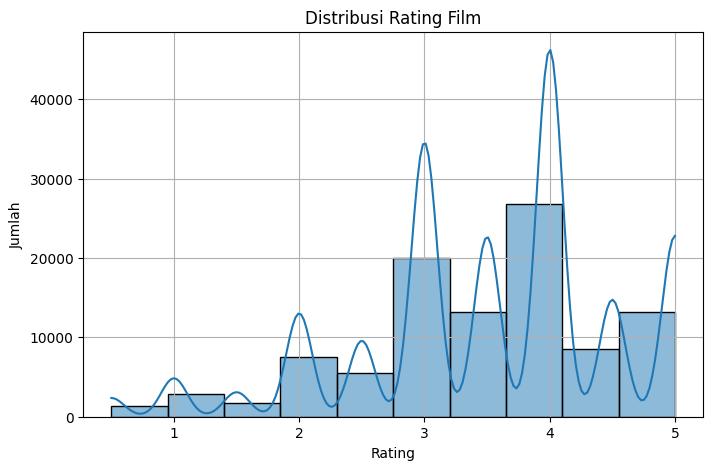

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(rating['rating'], bins=10, kde=True)
plt.title('Distribusi Rating Film')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.grid(True)
plt.show()

Menghitung jumlah rating untuk setiap film, mengidentifikasi 20 film teratas dengan rating terbanyak, dan memvisualisasikannya dalam bentuk bar plot.

<ipython-input-5-045cccb9bd6e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='movieId', data=top_movies.set_index('movieId').loc[rating_count.index].reset_index(), palette='viridis')


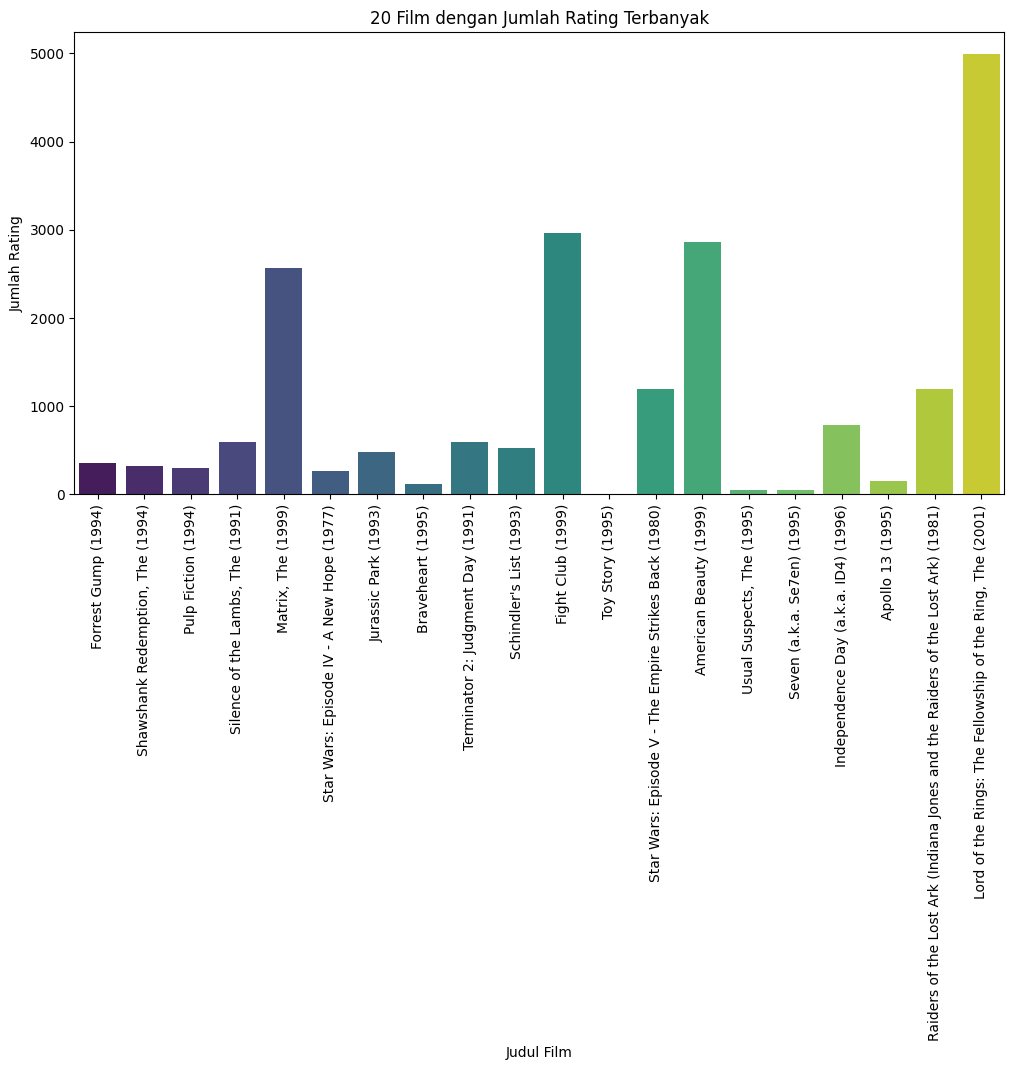

In [ ]:
# Hitung jumlah rating untuk setiap movie
rating_count = rating['movieId'].value_counts().head(20)

# Gabungkan dengan judul film
top_movies = movies[movies['movieId'].isin(rating_count.index)]

# Visualisasi film dengan rating terbanyak
plt.figure(figsize=(12, 6))
sns.barplot(x='title', y='movieId', data=top_movies.set_index('movieId').loc[rating_count.index].reset_index(), palette='viridis')
plt.xticks(rotation=90)
plt.title('20 Film dengan Jumlah Rating Terbanyak')
plt.xlabel('Judul Film')
plt.ylabel('Jumlah Rating')
plt.show()

Menghitung rata-rata rating dan jumlah rating untuk setiap film, kemudian menampilkan 10 film dengan rata-rata rating tertinggi yang memiliki minimal 50 rating, dan memvisualisasikannya.

<ipython-input-6-4685ea7e5f88>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='mean_rating', data=top_rated_movies, palette='rocket')


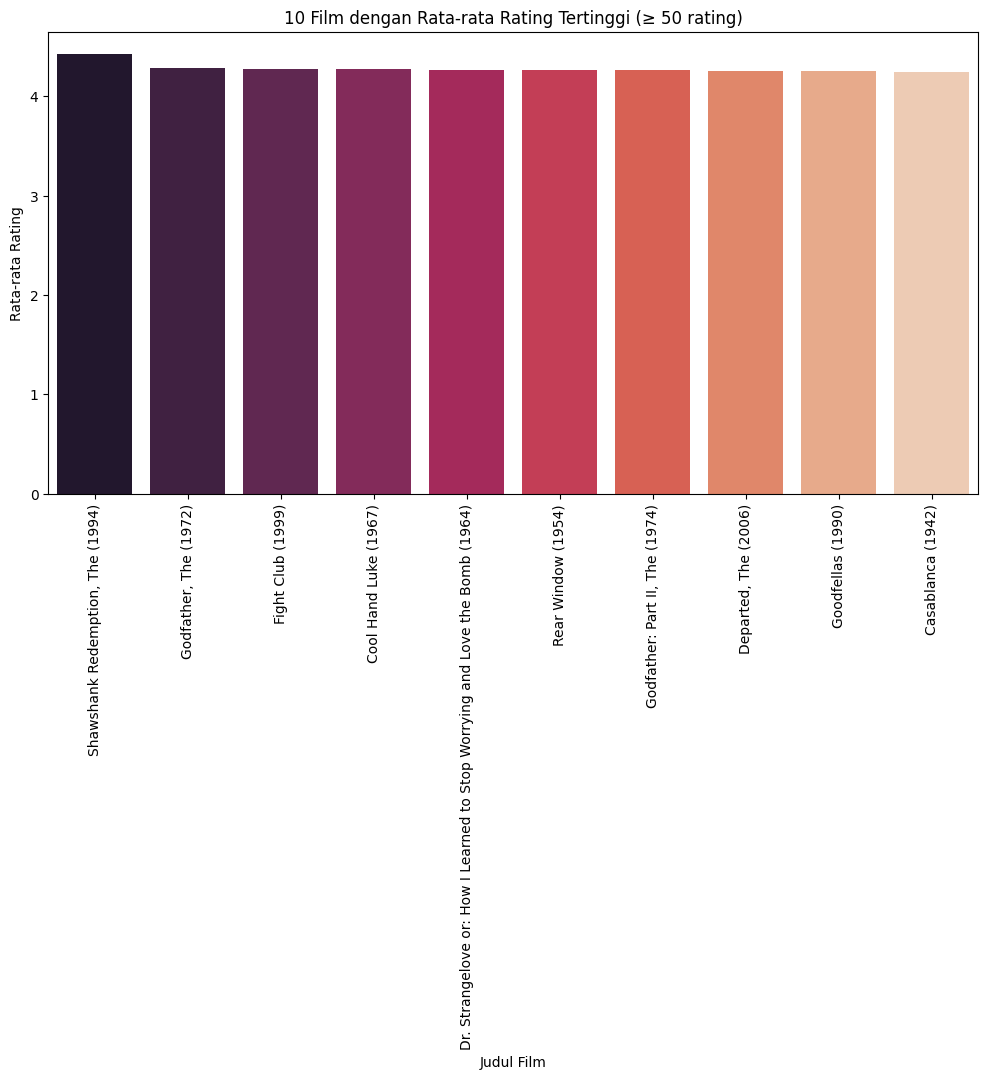

In [ ]:
# Menghitung rata-rata rating per movie
mean_ratings = rating.groupby('movieId')['rating'].mean()

# Gabungkan dengan jumlah rating
movie_stats = rating.groupby('movieId').agg({'rating': ['mean', 'count']})
movie_stats.columns = ['mean_rating', 'rating_count']
movie_stats = movie_stats.reset_index()

# Gabungkan dengan judul film
movie_stats = movie_stats.merge(movies, on='movieId')

# Tampilkan 10 film dengan rata-rata rating tertinggi (min 50 rating)
top_rated_movies = movie_stats[movie_stats['rating_count'] >= 50].sort_values(by='mean_rating', ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x='title', y='mean_rating', data=top_rated_movies, palette='rocket')
plt.xticks(rotation=90)
plt.title('10 Film dengan Rata-rata Rating Tertinggi (≥ 50 rating)')
plt.xlabel('Judul Film')
plt.ylabel('Rata-rata Rating')
plt.show()

Memproses kolom genre dengan memisahkan string genre menjadi list, menghitung frekuensi setiap genre, dan memvisualisasikan jumlah film per genre dalam bar plot.

<ipython-input-7-4ad46bee8aef>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Jumlah Film', y='Genre', data=genre_df, palette='cubehelix')


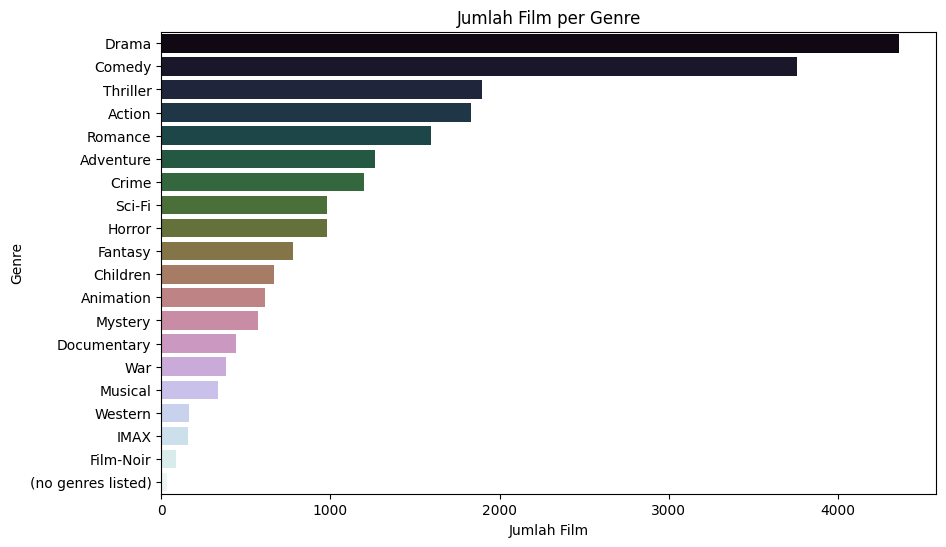

In [ ]:
# Pecah genre menjadi list
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))

# Hitung jumlah masing-masing genre
from collections import Counter
genre_counter = Counter([genre for genres in movies['genres'] for genre in genres])
genre_df = pd.DataFrame(genre_counter.items(), columns=['Genre', 'Jumlah Film']).sort_values(by='Jumlah Film', ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='Jumlah Film', y='Genre', data=genre_df, palette='cubehelix')
plt.title('Jumlah Film per Genre')
plt.xlabel('Jumlah Film')
plt.ylabel('Genre')
plt.show()

Mengkonversi kolom timestamp di dataset rating menjadi format datetime, mengekstrak tahun rating, dan memvisualisasikan jumlah rating per tahun.

<ipython-input-8-a55b464d24d7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=rating, palette='crest')


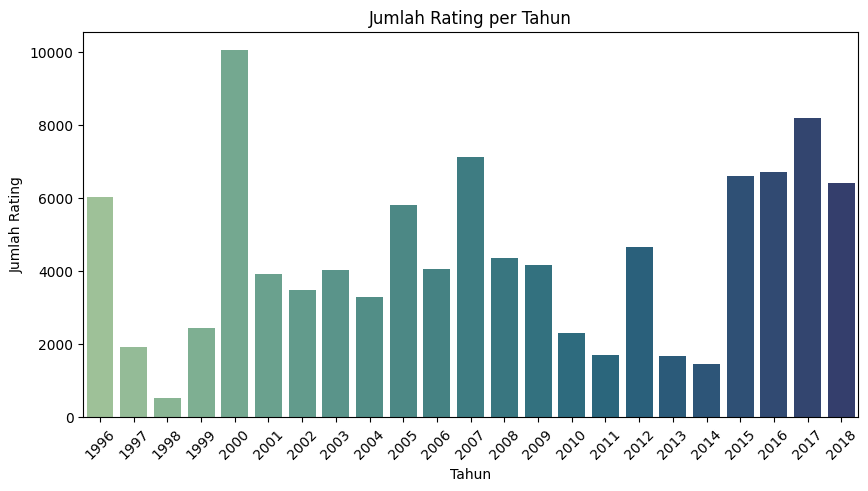

In [ ]:
# Konversi timestamp ke datetime
rating['datetime'] = pd.to_datetime(rating['timestamp'], unit='s')

# Buat kolom tahun rating
rating['year'] = rating['datetime'].dt.year

# Visualisasi jumlah rating per tahun
plt.figure(figsize=(10, 5))
sns.countplot(x='year', data=rating, palette='crest')
plt.xticks(rotation=45)
plt.title('Jumlah Rating per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Rating')
plt.show()

## Data Preprocessing

Bagian ini melakukan langkah-langkah untuk membersihkan dan menyiapkan data sebelum digunakan dalam model rekomendasi. Ini mencakup penghapusan duplikat, pemrosesan kolom genre menggunakan one-hot encoding, konversi timestamp ke format datetime, dan penggabungan dataset movies dan ratings.


 Menghapus baris duplikat dari DataFrame movies dan rating.

In [ ]:
movies.drop_duplicates(subset=['movieId', 'title'], inplace=True)
rating.drop_duplicates(inplace=True)

 Memastikan kolom 'genres' di DataFrame movies adalah list dengan memisahkannya berdasarkan delimiter '|'.

In [ ]:
if isinstance(movies['genres'].iloc[0], str):
    movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))

 Menggunakan MultiLabelBinarizer untuk melakukan one-hot encoding pada kolom genre, mengubah list genre menjadi kolom biner untuk setiap genre.

In [ ]:
mlb = MultiLabelBinarizer()
genre_matrix = pd.DataFrame(mlb.fit_transform(movies['genres']), columns=mlb.classes_)

Menggabungkan matriks genre yang sudah di-one-hot encode dengan kolom movieId dan title dari DataFrame movies.

In [ ]:
movies = pd.concat([movies[['movieId', 'title']], genre_matrix], axis=1)

Mengkonversi kolom timestamp di DataFrame rating menjadi objek datetime menggunakan pd.to_datetime.

In [ ]:
rating['datetime'] = pd.to_datetime(rating['timestamp'], unit='s')

 Menambahkan kolom baru 'rating_year' ke DataFrame rating yang berisi tahun dari kolom datetime yang baru dibuat.

In [ ]:
rating['rating_year'] = rating['datetime'].dt.year

Menggabungkan DataFrame rating dan movies berdasarkan kolom movieId, menampilkan jumlah data setelah penggabungan, dan menampilkan beberapa baris pertama dari DataFrame gabungan.

In [ ]:
movie_rating = pd.merge(rating, movies, on='movieId', how='inner')

# Tampilkan jumlah data akhir
print("Jumlah data setelah preprocessing:")
print("Movies:", len(movies))
print("Ratings:", len(rating))
print("Gabungan Movie-Rating:", len(movie_rating))

# Tampilkan 5 baris pertama untuk verifikasi
movie_rating.head()

Jumlah data setelah preprocessing:
Movies: 9742
Ratings: 100836
Gabungan Movie-Rating: 100836


,userId,movieId,rating,timestamp,datetime,year,rating_year,title,(no genres listed),Action,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,964982703,2000-07-30 18:45:03,2000,2000,Toy Story (1995),0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,964981247,2000-07-30 18:20:47,2000,2000,Grumpier Old Men (1995),0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,964982224,2000-07-30 18:37:04,2000,2000,Heat (1995),0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,47,5.0,964983815,2000-07-30 19:03:35,2000,2000,Seven (a.k.a. Se7en) (1995),0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,5.0,964982931,2000-07-30 18:48:51,2000,2000,"Usual Suspects, The (1995)",0,0,...,0,0,0,0,1,0,0,1,0,0


Menampilkan informasi ringkas tentang DataFrame movie_rating yang sudah digabungkan, termasuk tipe data dan jumlah nilai non-null di setiap kolom.

In [ ]:
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   userId              100836 non-null  int64         
 1   movieId             100836 non-null  int64         
 2   rating              100836 non-null  float64       
 3   timestamp           100836 non-null  int64         
 4   datetime            100836 non-null  datetime64[ns]
 5   year                100836 non-null  int32         
 6   rating_year         100836 non-null  int32         
 7   title               100836 non-null  object        
 8   (no genres listed)  100836 non-null  int64         
 9   Action              100836 non-null  int64         
 10  Adventure           100836 non-null  int64         
 11  Animation           100836 non-null  int64         
 12  Children            100836 non-null  int64         
 13  Comedy              100836 no

## Content Based Filtering
Bagian ini membangun sistem rekomendasi berbasis konten. Metode ini merekomendasikan item kepada pengguna berdasarkan kesamaan atribut item tersebut dengan item yang disukai pengguna di masa lalu. Dalam notebook ini, kesamaan dihitung berdasarkan genre film. Bagian ini juga mencakup evaluasi model menggunakan metrik Precision@K.

Import library yang diperlukan.

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import random
import warnings
warnings.filterwarnings('ignore')

Mempersiapkan data untuk content-based filtering dengan memilih kolom genre dari DataFrame gabungan, membuat matriks fitur genre, dan menghitung matriks cosine similarity antar film berdasarkan genre.

In [ ]:
# Asumsikan movie_rating sudah termasuk kolom movieId, title, genre one-hot (Action, Comedy, dsb.)
genre_columns = movie_rating.columns[9:]  # Mulai dari kolom 'Action' hingga 'Western'
movie_features = movie_rating[['movieId', 'title'] + list(genre_columns)].drop_duplicates('movieId')

# Matriks fitur genre
genre_matrix = movie_features[genre_columns].values

# Matriks cosine similarity antar film
cosine_sim = cosine_similarity(genre_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=movie_features['movieId'], columns=movie_features['movieId'])

 Mendefinisikan fungsi movie_recommendations yang mengambil movie_id dan jumlah rekomendasi k sebagai input, dan mengembalikan DataFrame berisi movieId dan title dari film-film yang paling mirip berdasarkan cosine similarity.

In [ ]:
def movie_recommendations(movie_id, k=5):
    if movie_id not in cosine_sim_df:
        return pd.DataFrame()

    sim_scores = cosine_sim_df[movie_id].drop(movie_id, errors='ignore')
    top_k_ids = sim_scores.nlargest(k).index
    return movie_features[movie_features['movieId'].isin(top_k_ids)][['movieId', 'title']]

Menyiapkan data rating untuk identifikasi film yang disukai pengguna (rating >= 4) dan membuat mapping antara movieId dan title untuk memudahkan pencarian.

In [ ]:
# Ambil data rating
rating_data = movie_rating[['userId', 'movieId', 'rating']]

# Asumsikan rating >= 4 dianggap "disukai"
user_likes = rating_data[rating_data['rating'] >= 4].groupby('userId')['movieId'].apply(list)

# Buat mapping movieId <-> title
id_to_title = movie_features.set_index('movieId')['title'].to_dict()
title_to_id = movie_features.set_index('title')['movieId'].to_dict()

Menunjukkan contoh penggunaan fungsi movie_recommendations untuk mendapatkan rekomendasi film berdasarkan film "Toy Story (1995)".

In [ ]:
# Cek movieId dari "Toy Story (1995)"
title_query = "Toy Story (1995)"
movie_id_query = title_to_id[title_query]

# Tampilkan rekomendasi film mirip
recommendations = movie_recommendations(movie_id_query, k=5)
print("Rekomendasi untuk:", title_query)
display(recommendations)

Rekomendasi untuk: Toy Story (1995)


,movieId,title
927,3114,Toy Story 2 (1999)
947,4886,"Monsters, Inc. (2001)"
2714,2294,Antz (1998)
2962,3754,"Adventures of Rocky and Bullwinkle, The (2000)"
3127,4016,"Emperor's New Groove, The (2000)"


Mendefinisikan fungsi evaluate_precision_at_k untuk menghitung Precision@K, metrik evaluasi yang mengukur proporsi item yang relevan (disukai pengguna) dalam k item teratas yang direkomendasikan.

In [ ]:
def evaluate_precision_at_k(user_id, k=5):
    liked_ids = user_likes.get(user_id, [])
    if not liked_ids:
        return None

    query_id = liked_ids[0]  # ambil satu movie yang disukai sebagai query
    recs = movie_recommendations(query_id, k=k)
    if recs.empty:
        return None

    recommended_ids = recs['movieId'].tolist()
    hits = len(set(recommended_ids) & set(liked_ids))
    return hits / k

Melakukan evaluasi Precision@5 pada sampel 100 pengguna acak untuk mengukur kinerja sistem rekomendasi berbasis konten secara keseluruhan.

In [ ]:
random.seed(42)
sample_users = random.sample(list(user_likes.index), 100)
scores = [evaluate_precision_at_k(uid) for uid in sample_users]
scores = [s for s in scores if s is not None]

avg_precision_at_k = sum(scores) / len(scores)
print(f"Average Precision@5: {avg_precision_at_k:.4f}")

Average Precision@5: 0.0920


## Collaborative Filtering
Bagian ini membangun sistem rekomendasi berbasis kolaboratif filtering menggunakan model neural network. Metode ini merekomendasikan item kepada pengguna berdasarkan preferensi pengguna lain yang memiliki selera serupa. Ini melibatkan persiapan data, pembangunan model, pelatihan model, dan mendapatkan rekomendasi untuk pengguna tertentu.


Import library

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

 Menyiapkan data untuk model collaborative filtering dengan membuat mapping integer untuk user dan movie ID, menormalisasi rating, dan membagi data menjadi set pelatihan dan validasi.

In [ ]:
df = rating[['userId', 'movieId', 'rating']].dropna()

# Mapping user dan movie ke angka
user_ids = df['userId'].unique().tolist()
movie_ids = df['movieId'].unique().tolist()

user_to_encoded = {x: i for i, x in enumerate(user_ids)}
movie_to_encoded = {x: i for i, x in enumerate(movie_ids)}

df['user'] = df['userId'].map(user_to_encoded)
df['movie'] = df['movieId'].map(movie_to_encoded)

# Normalisasi rating ke rentang 0-1
df['rating'] = df['rating'].astype('float32')
min_rating, max_rating = df['rating'].min(), df['rating'].max()
df['norm_rating'] = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating))

# Acak dan split data
df = df.sample(frac=1, random_state=42)
x = df[['user', 'movie']].values
y = df['norm_rating'].values

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

Mendefinisikan kelas model RecommenderNet yang merupakan model neural network untuk collaborative filtering, menggunakan embedding layer untuk merepresentasikan user dan movie, serta layer dense untuk memprediksi rating.

In [ ]:
class RecommenderNet(Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(num_users, embedding_size,
                                               embeddings_initializer='he_normal',
                                               embeddings_regularizer=regularizers.l2(1e-4))
        self.movie_embedding = layers.Embedding(num_movies, embedding_size,
                                                embeddings_initializer='he_normal',
                                                embeddings_regularizer=regularizers.l2(1e-4))
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_bias = layers.Embedding(num_movies, 1)

        self.dense1 = layers.Dense(64, activation='relu')
        self.dropout = layers.Dropout(0.7)
        self.output_layer = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        user_vec = self.user_embedding(inputs[:, 0])
        movie_vec = self.movie_embedding(inputs[:, 1])
        user_bias = self.user_bias(inputs[:, 0])
        movie_bias = self.movie_bias(inputs[:, 1])

        dot = tf.reduce_sum(user_vec * movie_vec, axis=1, keepdims=True)
        x = dot + user_bias + movie_bias
        x = self.dense1(x)
        x = self.dropout(x)
        return self.output_layer(x)

Menginisialisasi model RecommenderNet, mengkompilasinya dengan mean squared error (MSE) sebagai loss function dan optimizer Adam, serta melatih model menggunakan data pelatihan dan validasi dengan callback EarlyStopping dan ReduceLROnPlateau.

In [ ]:
num_users = len(user_to_encoded)
num_movies = len(movie_to_encoded)

model = RecommenderNet(num_users, num_movies, embedding_size=50)
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    batch_size=128,
    epochs=30,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

Epoch 1/30
631/631 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.0567 - root_mean_squared_error: 0.2315 - val_loss: 0.0384 - val_root_mean_squared_error: 0.1950 - learning_rate: 0.0010
Epoch 2/30
631/631 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0366 - root_mean_squared_error: 0.1905 - val_loss: 0.0372 - val_root_mean_squared_error: 0.1924 - learning_rate: 0.0010
Epoch 3/30
631/631 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0340 - root_mean_squared_error: 0.1837 - val_loss: 0.0373 - val_root_mean_squared_error: 0.1924 - learning_rate: 0.0010
Epoch 4/30
631/631 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0330 - root_mean_squared_error: 0.1808 - val_loss: 0.0371 - val_root_mean_squared_error: 0.1921 - learning_rate: 0.0010
Epoch 5/30
631/631 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0318 - root_mean_squared_error: 0.1781 - val_loss: 0.0370 - val_root_mean_squared_error: 0.1922 - learning_rate: 5.0000e-04
Epoch 6/30
631/631 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0312 - root_mean_

Memvisualisasikan nilai Root Mean Squared Error (RMSE) selama pelatihan dan validasi untuk memantau kinerja model dari waktu ke waktu.

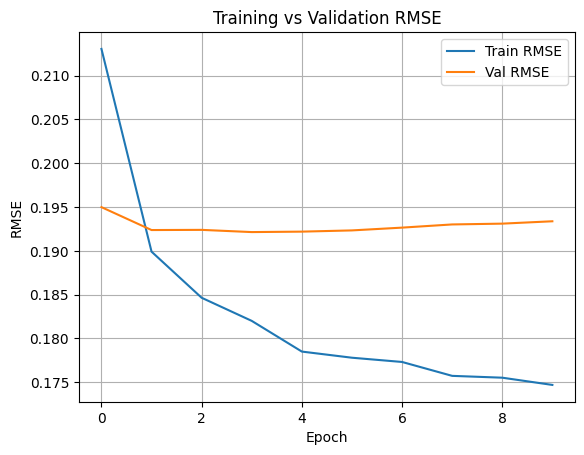

In [ ]:
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Val RMSE')
plt.legend()
plt.title('Training vs Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

Menunjukkan cara mendapatkan rekomendasi film untuk pengguna tertentu menggunakan model collaborative filtering yang sudah dilatih. Ini memilih pengguna acak, mengidentifikasi film yang belum ditonton pengguna, memprediksi rating untuk film-film tersebut, dan menampilkan 10 film dengan prediksi rating tertinggi.

In [ ]:
encoded_to_movie = {v: k for k, v in movie_to_encoded.items()}

user_id = df.userId.sample(1).iloc[0]
movies_watched = rating[rating['userId'] == user_id]['movieId'].tolist()

movies_not_watched = list(
    set(movie_ids) - set(movies_watched)
)
movies_not_watched_encoded = [movie_to_encoded[m] for m in movies_not_watched if m in movie_to_encoded]

user_encoded = user_to_encoded[user_id]
user_movie_array = np.hstack(
    ([[user_encoded]] * len(movies_not_watched_encoded), np.array(movies_not_watched_encoded).reshape(-1, 1))
)

ratings = model.predict(user_movie_array).flatten()
top_k_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [encoded_to_movie[movies_not_watched_encoded[i]] for i in top_k_indices]

# Tampilkan rekomendasi
print(f"Rekomendasi untuk user {user_id}")
print("-" * 30)
recommended_movies = movies[movies['movieId'].isin(recommended_movie_ids)]
for row in recommended_movies.itertuples():
    print(f"{row.title}")

301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Rekomendasi untuk user 301
------------------------------
Persuasion (1995)
Shawshank Redemption, The (1994)
Streetcar Named Desire, A (1951)
Lawrence of Arabia (1962)
Swept Away (Travolti da un insolito destino nell'azzurro mare d'Agosto) (1975)
Jules and Jim (Jules et Jim) (1961)
Lady Eve, The (1941)
Trial, The (Procès, Le) (1962)
Baby Driver (2017)
Three Billboards Outside Ebbing, Missouri (2017)
